In [2]:
%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
sf_crime = pd.read_csv('data/train.csv') 
sf_locs = pd.read_csv('data/sf_locations_zip.csv') 

In [4]:
sf_crime['Location'] = sf_crime['Y'].astype(str).str.cat(sf_crime['X'].astype(str), sep=',')
sf_crime_locs = sf_crime.merge(sf_locs[['Location','ZipCode']], how='left', on='Location')

In [5]:
z=sf_crime_locs.Category.value_counts()
z/sum(z)

LARCENY/THEFT                  0.199192
OTHER OFFENSES                 0.143707
NON-CRIMINAL                   0.105124
ASSAULT                        0.087553
DRUG/NARCOTIC                  0.061467
VEHICLE THEFT                  0.061251
VANDALISM                      0.050937
WARRANTS                       0.048077
BURGLARY                       0.041860
SUSPICIOUS OCC                 0.035777
MISSING PERSON                 0.029599
ROBBERY                        0.026194
FRAUD                          0.018996
FORGERY/COUNTERFEITING         0.012082
SECONDARY CODES                0.011372
WEAPON LAWS                    0.009743
PROSTITUTION                   0.008523
TRESPASS                       0.008343
STOLEN PROPERTY                0.005171
SEX OFFENSES FORCIBLE          0.004997
DISORDERLY CONDUCT             0.004920
DRUNKENNESS                    0.004874
RECOVERED VEHICLE              0.003574
KIDNAPPING                     0.002666
DRIVING UNDER THE INFLUENCE    0.002583


In [7]:
topn_zips = sf_crime_locs.ZipCode.value_counts()[:6]
topn_crimes = sf_crime_locs.Category.value_counts()[:15]

sf_crime_locs_topn = sf_crime_locs[sf_crime_locs['ZipCode'].isin(topn_zips.index.tolist())]
sf_crime_locs_topn = sf_crime_locs_topn[sf_crime_locs_topn['Category'].isin(topn_crimes.index.tolist())]

zip_count = sf_crime_locs_topn.groupby(['ZipCode']).size()
zip_cat_count = sf_crime_locs_topn.groupby(['ZipCode', 'Category']).size()

zip_cat_pct = zip_cat_count.div(zip_count, level='ZipCode') * 100
zip_cat_pct.unstack().T.head(2)

ZipCode  Category
94102    ASSAULT     10.108226
         BURGLARY     2.297809
dtype: float64

In [8]:
zip_cat_pct.to_dict()

{(94102, 'ASSAULT'): 10.108226262195446,
 (94102, 'BURGLARY'): 2.2978088180412648,
 (94102, 'DRUG/NARCOTIC'): 18.610195050990487,
 (94102, 'FORGERY/COUNTERFEITING'): 1.0997798916975756,
 (94102, 'FRAUD'): 1.3770097258928096,
 (94102, 'LARCENY/THEFT'): 15.102933000251333,
 (94102, 'MISSING PERSON'): 1.4303231555457392,
 (94102, 'NON-CRIMINAL'): 10.064052277625876,
 (94102, 'OTHER OFFENSES'): 17.893510232370392,
 (94102, 'ROBBERY'): 3.194997677057708,
 (94102, 'SECONDARY CODES'): 1.0007692366278493,
 (94102, 'SUSPICIOUS OCC'): 3.243741384168958,
 (94102, 'VANDALISM'): 3.3016245363635668,
 (94102, 'VEHICLE THEFT'): 2.5803699952017913,
 (94102, 'WARRANTS'): 8.6946587559692006,
 (94103, 'ASSAULT'): 8.2916080443598439,
 (94103, 'BURGLARY'): 2.4497227509724406,
 (94103, 'DRUG/NARCOTIC'): 8.3257469171563354,
 (94103, 'FORGERY/COUNTERFEITING'): 1.2890010758917487,
 (94103, 'FRAUD'): 2.1124720681949847,
 (94103, 'LARCENY/THEFT'): 21.676115203178018,
 (94103, 'MISSING PERSON'): 2.5966233551270377

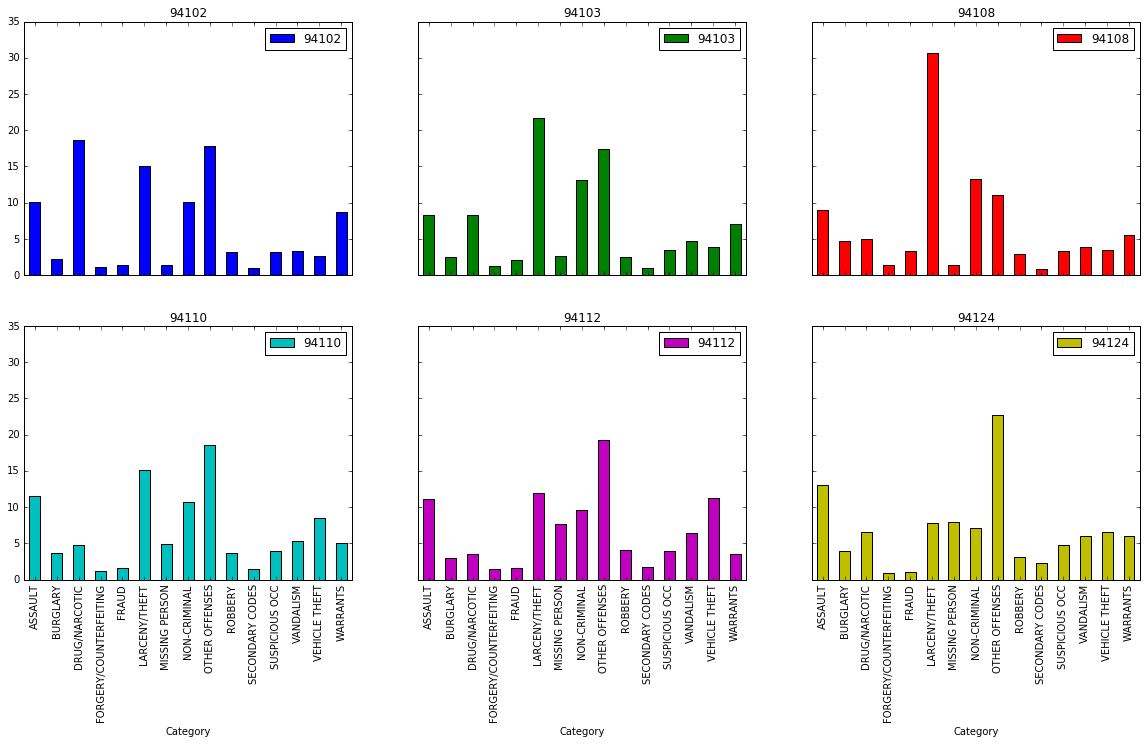

In [9]:
mpl.rcParams['figure.figsize'] = (20.0, 10.0)
zip_cat_pct.unstack().T.plot(kind='bar', subplots=True, layout=(2,3), sharex=True, sharey=True)
plt.show()

In [10]:
topn_crimes = sf_crime_locs.Category.value_counts()[:15]
sf_crime_locs_topn = sf_crime_locs[sf_crime_locs['Category'].isin(topn_crimes.index.tolist())]

pdd_count = sf_crime_locs_topn.groupby(['PdDistrict']).size()
pdd_cat_count = sf_crime_locs_topn.groupby(['PdDistrict', 'Category']).size()

pdd_cat_pct = pdd_cat_count.div(pdd_count, level='PdDistrict') * 100
pdd_cat_pct.unstack().T.head()

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ASSAULT,11.816961,8.717000,11.528433,10.319040,8.462540,7.577554,7.461261,8.202659,8.827950,10.121393
BURGLARY,4.711439,5.645998,4.500317,3.466213,5.955724,6.225882,6.282186,3.259384,5.596044,1.961275
DRUG/NARCOTIC,5.392380,2.255151,3.206020,8.105106,4.589387,5.546813,2.327857,6.213095,2.474024,23.324414
FORGERY/COUNTERFEITING,0.927902,1.429303,1.319967,1.185639,1.314451,1.116692,1.442386,1.578859,1.772700,0.740751
FRAUD,1.038195,2.928572,1.638813,1.823348,2.090709,2.099726,2.649423,2.316782,2.503111,1.489409


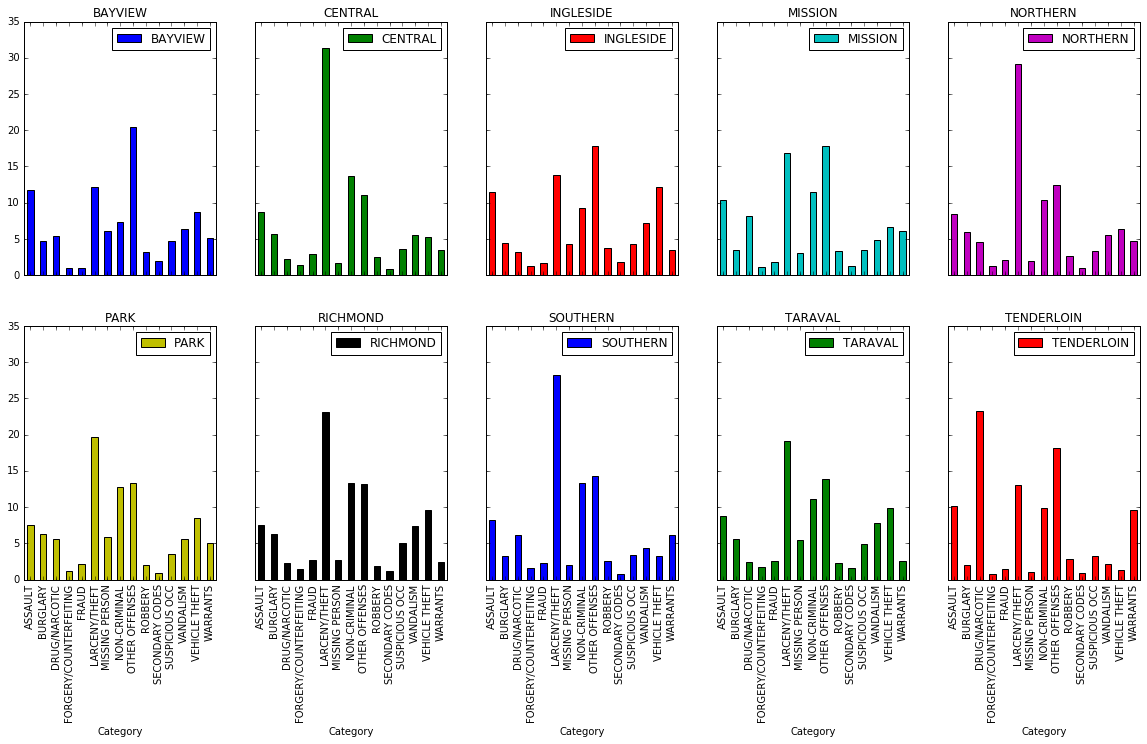

In [11]:
mpl.rcParams['figure.figsize'] = (20.0, 10.0)
pdd_cat_pct.unstack().T.plot(kind='bar', subplots=True, layout=(2,5), sharex=True, sharey=True)
plt.show()

In [5]:
sf_crime_locs.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Location,ZipCode
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,"37.7745985957,-122.425891675",94102
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,"37.7745985957,-122.425891675",94102


In [7]:
sf_crime_locs['AddressFeat'] = sf_crime_locs['Address'].apply(lambda x: x.split("of")[1].strip() if x.find("/") < 0 else x)
sf_crime_locs[['Address', 'AddressFeat']].head(20)

In [12]:
sf_crime_locs['X'].describe()

count    878049.000000
mean       -122.422616
std           0.030354
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -120.500000
Name: X, dtype: float64

In [23]:
minX, maxX = sf_crime_locs['X'].min(), sf_crime_locs['X'].max()
sf_crime_locs['X_norm'] = sf_crime_locs['X'].apply(lambda x: (x-minX)/(maxX-minX))

minY, maxY = sf_crime_locs['Y'].min(), sf_crime_locs['Y'].max()
sf_crime_locs['Y_norm'] = sf_crime_locs['Y'].apply(lambda x: (x-minY)/(maxY-minY))

In [24]:
sf_crime_locs['X_norm'].describe()

count    878049.000000
mean          0.045204
std           0.015074
min           0.000000
25%           0.040072
50%           0.048282
75%           0.052980
max           1.000000
Name: X_norm, dtype: float64

In [25]:
sf_crime_locs['Y_norm'].describe()

count    878049.000000
mean          0.001207
std           0.008737
min           0.000000
25%           0.000852
50%           0.001292
75%           0.001463
max           1.000000
Name: Y_norm, dtype: float64

In [29]:
pd.to_datetime(sf_crime_locs['Dates']).map(lambda x: x.isocalendar()[1]).value_counts()

10    36474
16    35916
12    35881
2     35857
14    35797
4     35573
6     35564
18    35545
8     35249
44    34681
40    34557
20    34292
34    34014
38    33974
42    33911
36    33507
32    32941
46    32813
26    32698
30    32674
22    32560
28    32220
24    31276
48    30867
50    30431
52    28777
Name: Dates, dtype: int64